
RESULTS FOR LAB1 AT 14.38:
YOLOV3 - TOTAL FACES DETECTED: 16.91, CONFIDENCE: 0.83, FRAME COUNT: 4388
INSIGHTFACE - TOTAL FACES DETECTED: 18.27, CONFIDENCE: 0.75, FRAME COUNT: 4388



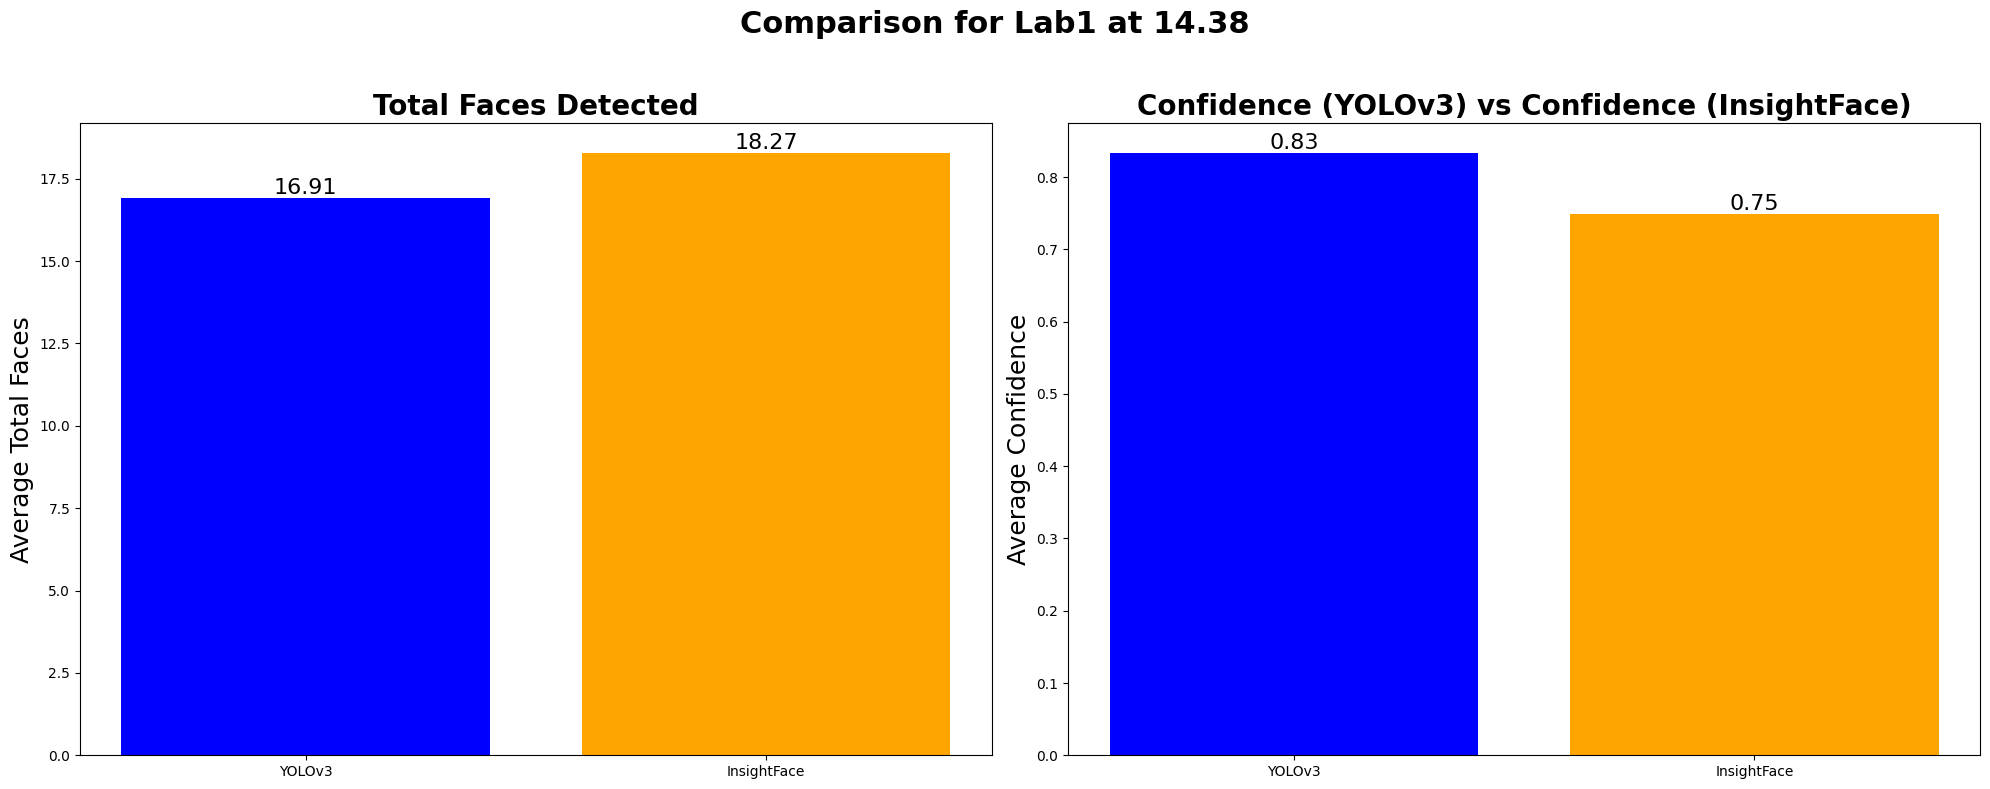


RESULTS FOR LAB1 AT 15.14:
YOLOV3 - TOTAL FACES DETECTED: 18.19, CONFIDENCE: 0.78, FRAME COUNT: 4382
INSIGHTFACE - TOTAL FACES DETECTED: 17.89, CONFIDENCE: 0.68, FRAME COUNT: 4382



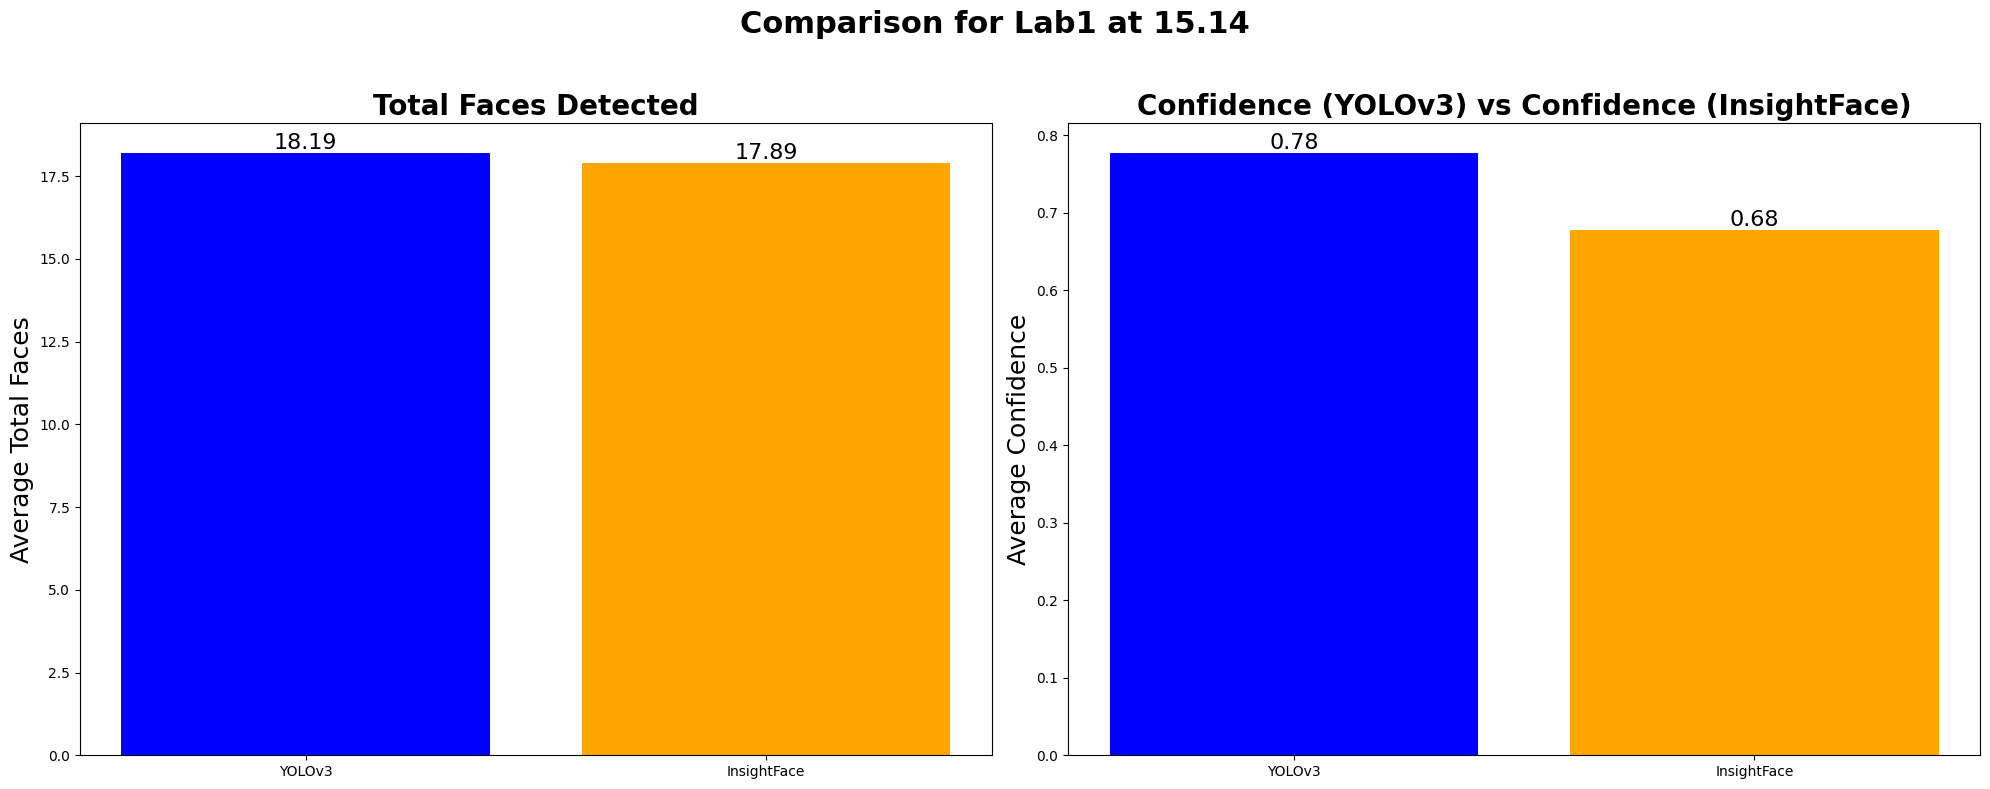


RESULTS FOR LAB1 AT 15.23:
YOLOV3 - TOTAL FACES DETECTED: 17.01, CONFIDENCE: 0.76, FRAME COUNT: 4361
INSIGHTFACE - TOTAL FACES DETECTED: 15.22, CONFIDENCE: 0.69, FRAME COUNT: 4361



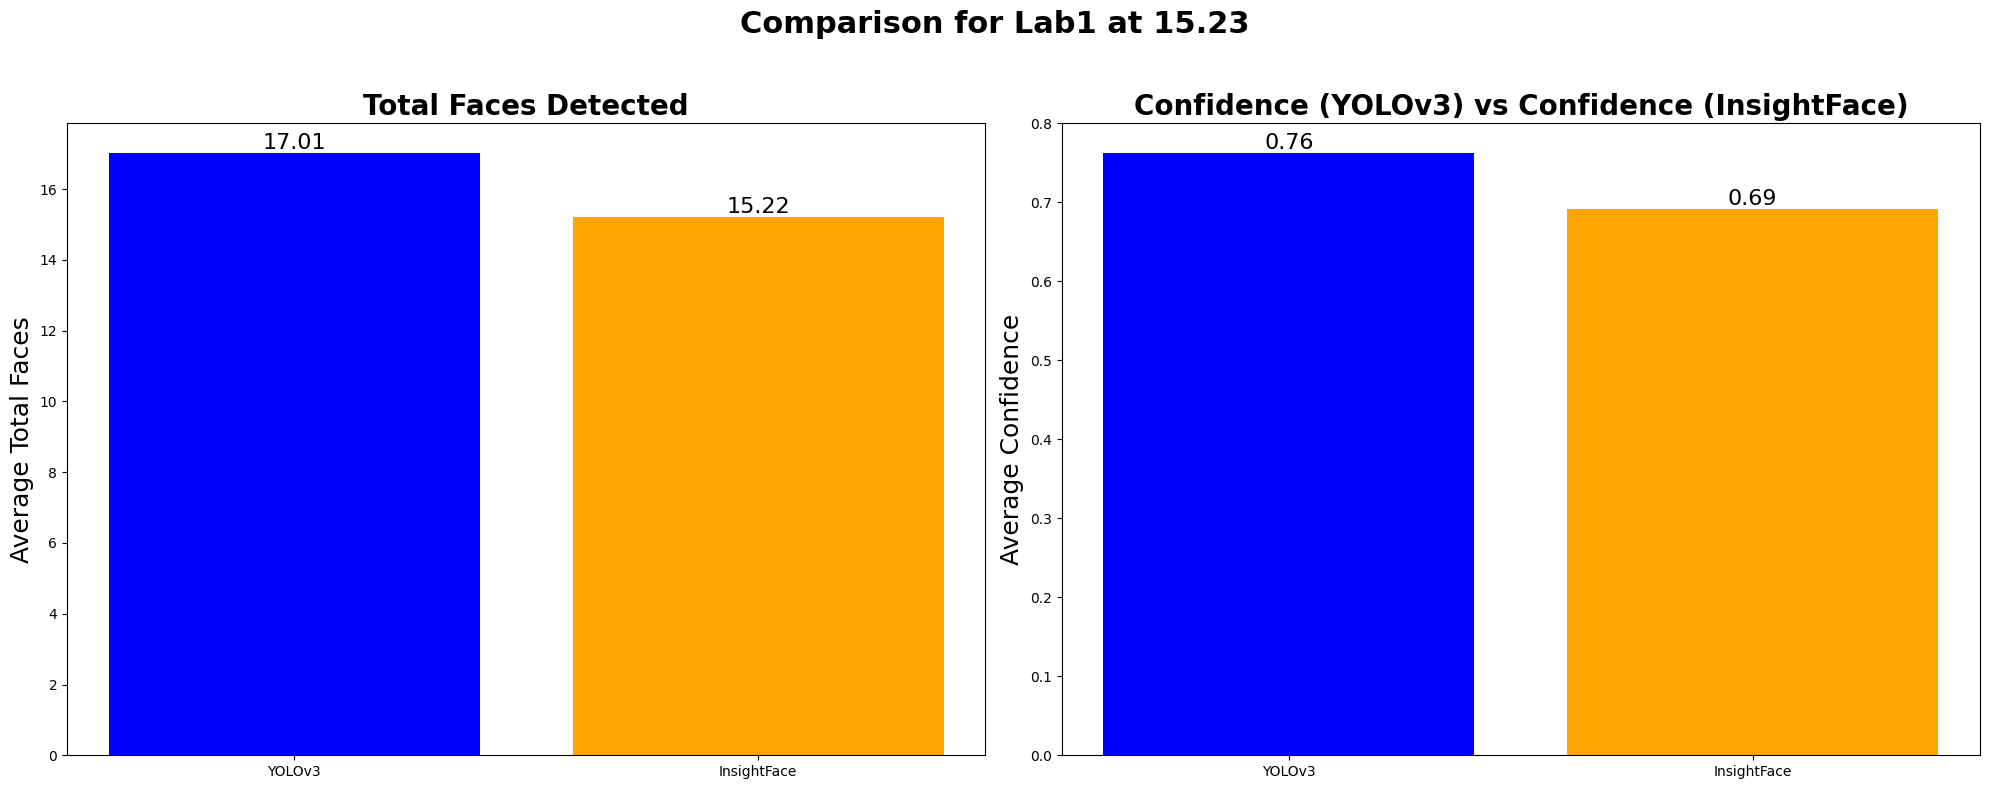


RESULTS FOR LAB3 AT 14.57:
YOLOV3 - TOTAL FACES DETECTED: 4.42, CONFIDENCE: 0.75, FRAME COUNT: 4313
INSIGHTFACE - TOTAL FACES DETECTED: 5.36, CONFIDENCE: 0.68, FRAME COUNT: 4313



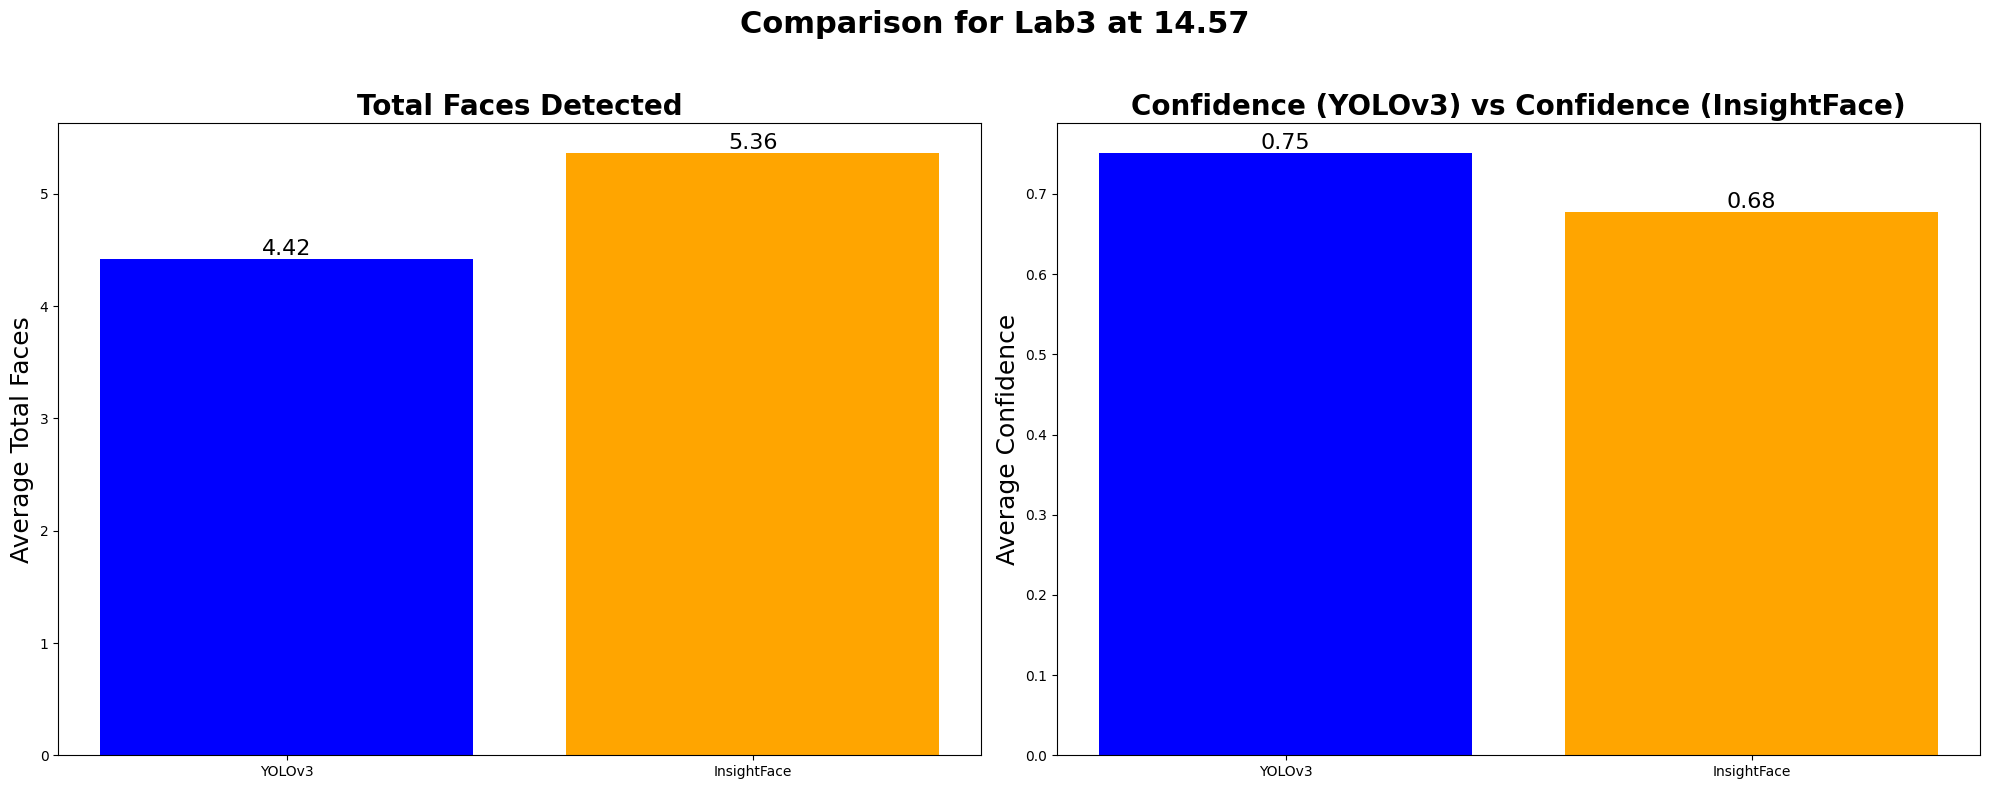


RESULTS FOR LAB3 AT 14.51:
YOLOV3 - TOTAL FACES DETECTED: 8.43, CONFIDENCE: 0.76, FRAME COUNT: 4326
INSIGHTFACE - TOTAL FACES DETECTED: 8.79, CONFIDENCE: 0.66, FRAME COUNT: 4326



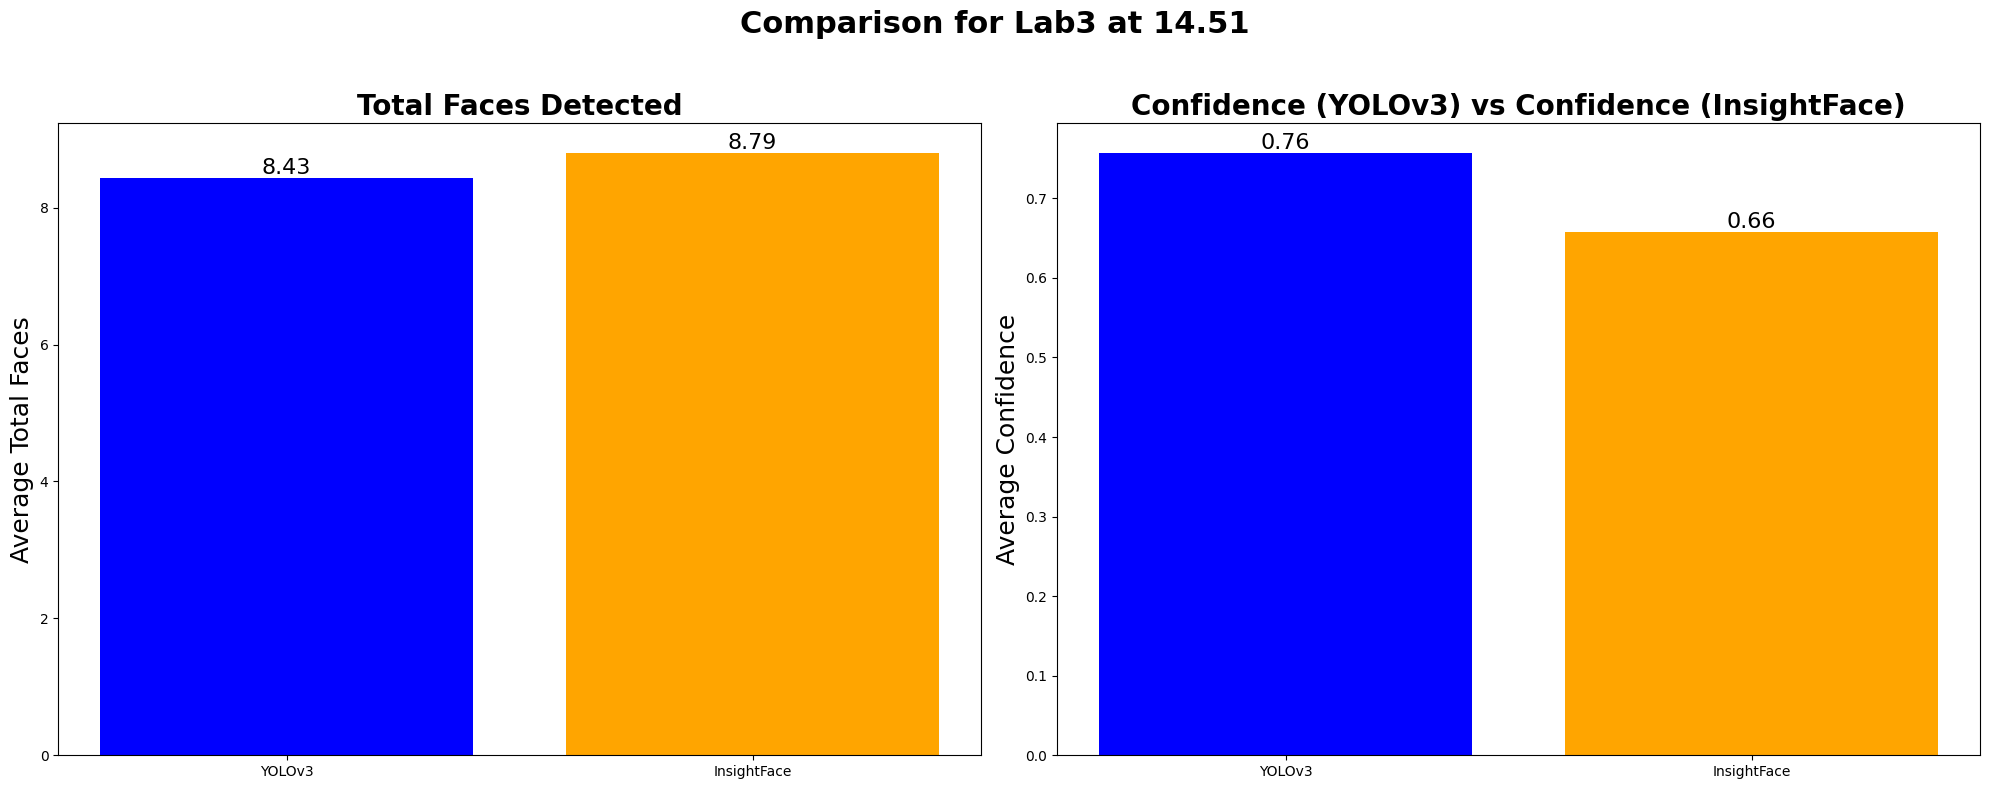


RESULTS FOR LAB3 AT 15.06:
YOLOV3 - TOTAL FACES DETECTED: 10.33, CONFIDENCE: 0.71, FRAME COUNT: 4316
INSIGHTFACE - TOTAL FACES DETECTED: 8.01, CONFIDENCE: 0.61, FRAME COUNT: 4316



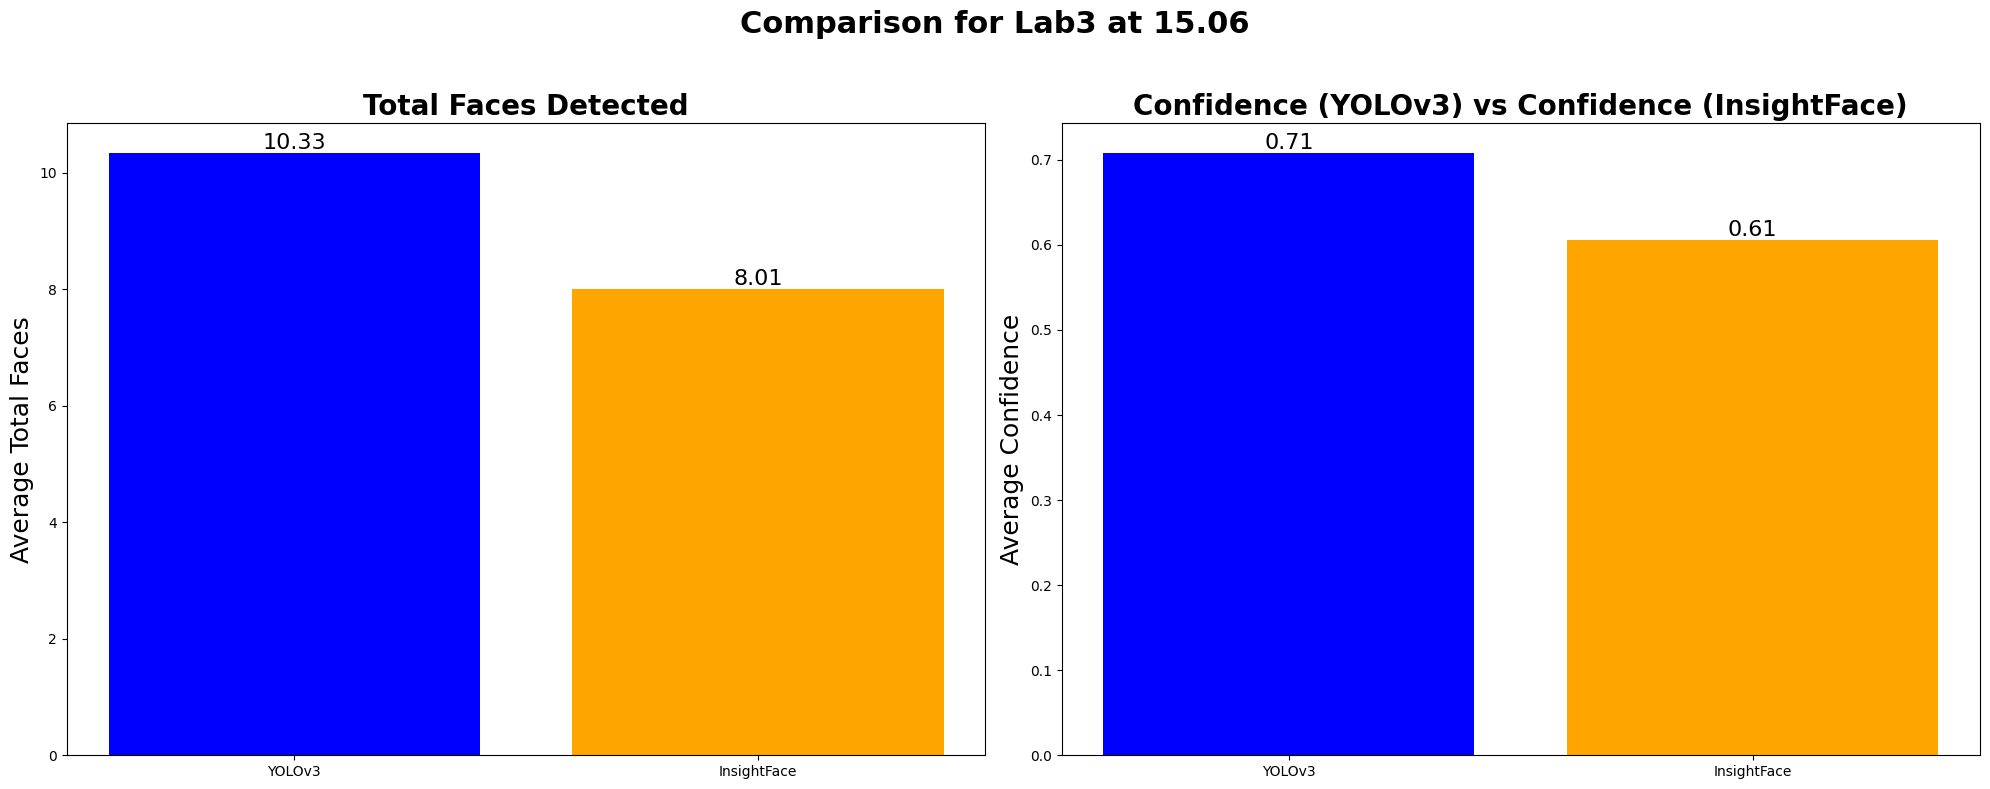


RESULTS FOR ROOM1 AT 9.45:
YOLOV3 - TOTAL FACES DETECTED: 19.65, CONFIDENCE: 0.78, FRAME COUNT: 4318
INSIGHTFACE - TOTAL FACES DETECTED: 16.94, CONFIDENCE: 0.67, FRAME COUNT: 4318



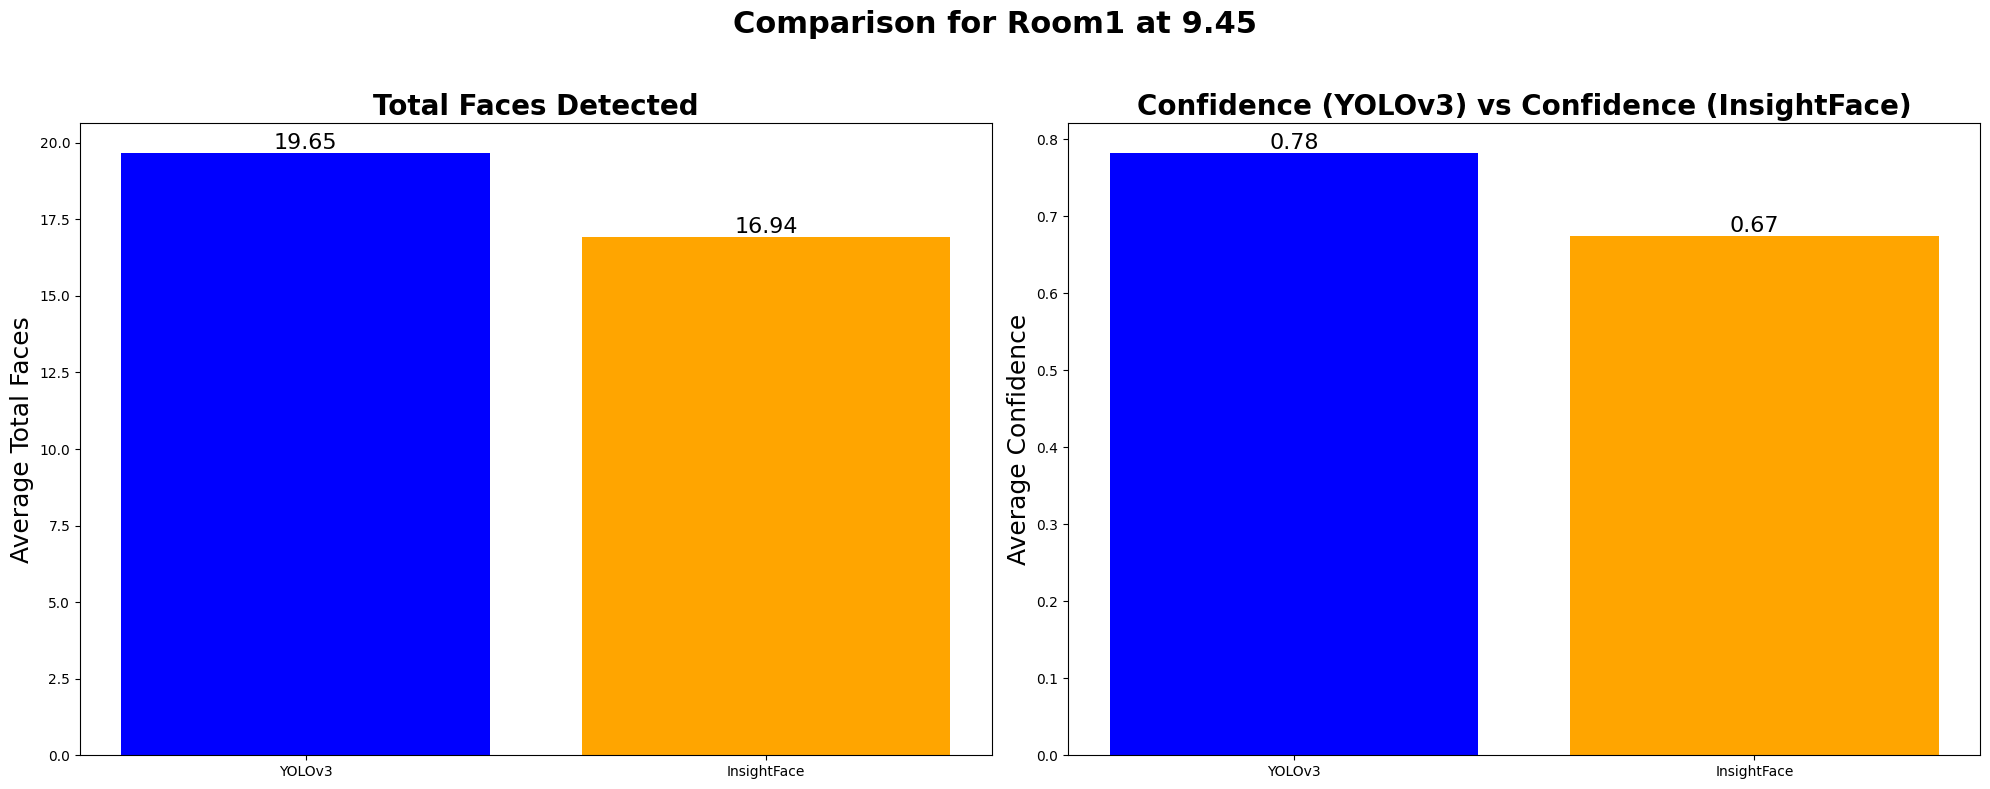


RESULTS FOR ROOM1 AT 9.52:
YOLOV3 - TOTAL FACES DETECTED: 17.56, CONFIDENCE: 0.74, FRAME COUNT: 4496
INSIGHTFACE - TOTAL FACES DETECTED: 13.62, CONFIDENCE: 0.62, FRAME COUNT: 4496



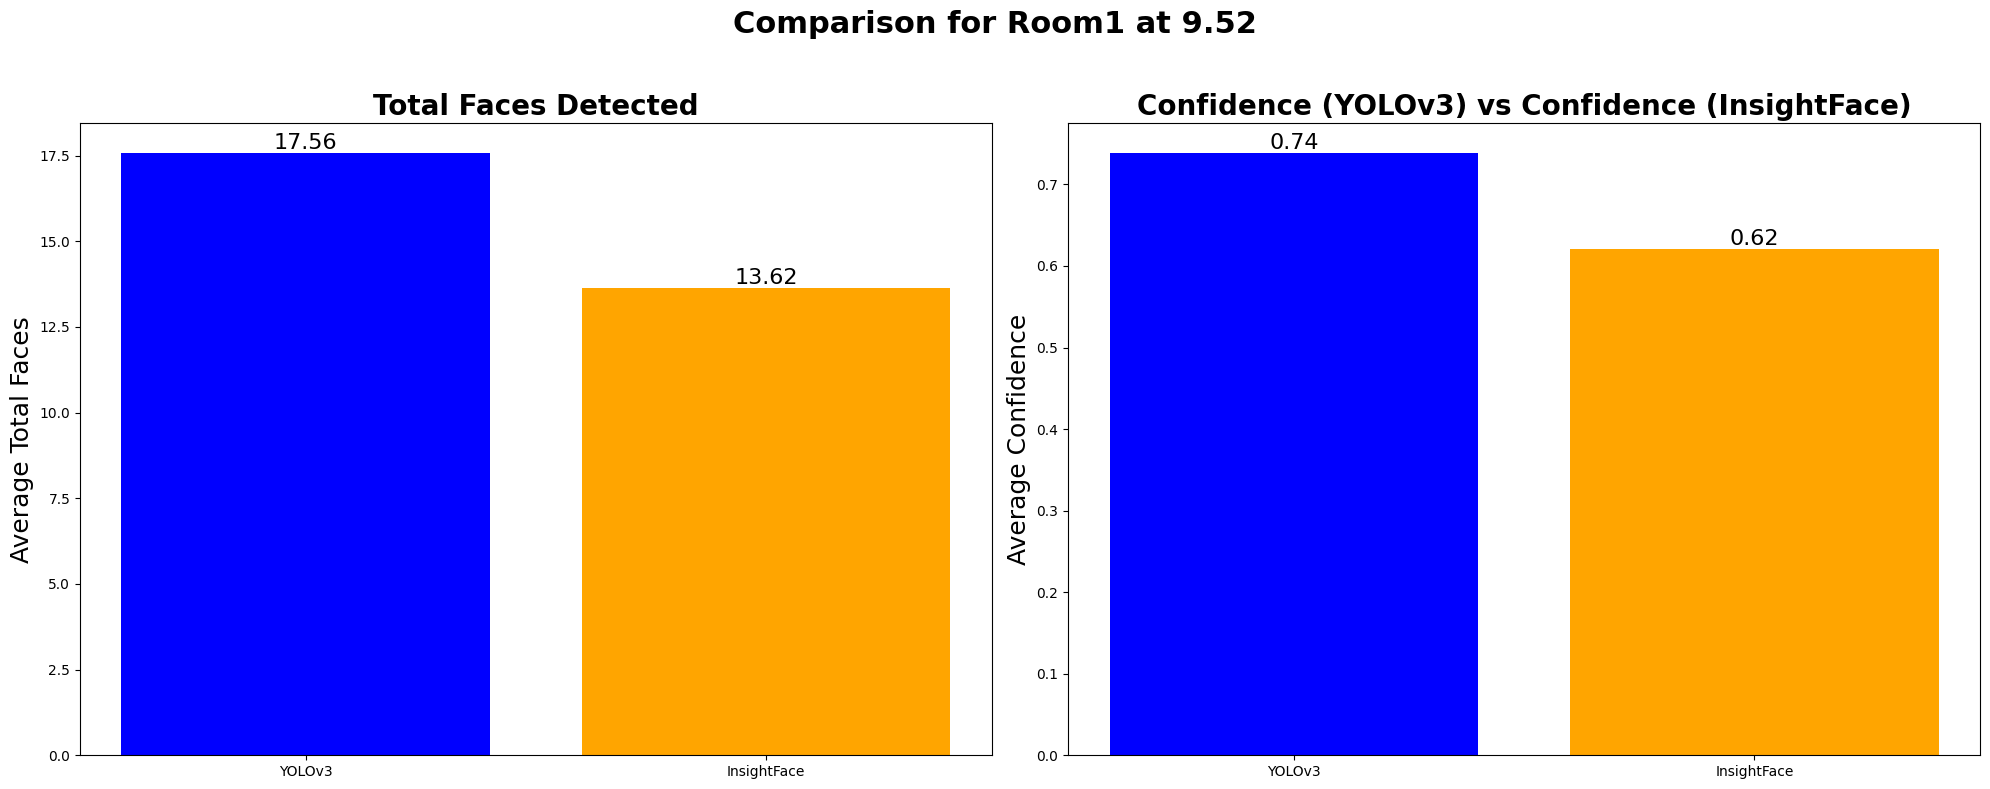


RESULTS FOR ROOM1 AT 9.38:
YOLOV3 - TOTAL FACES DETECTED: 19.87, CONFIDENCE: 0.80, FRAME COUNT: 4361
INSIGHTFACE - TOTAL FACES DETECTED: 17.97, CONFIDENCE: 0.69, FRAME COUNT: 4361



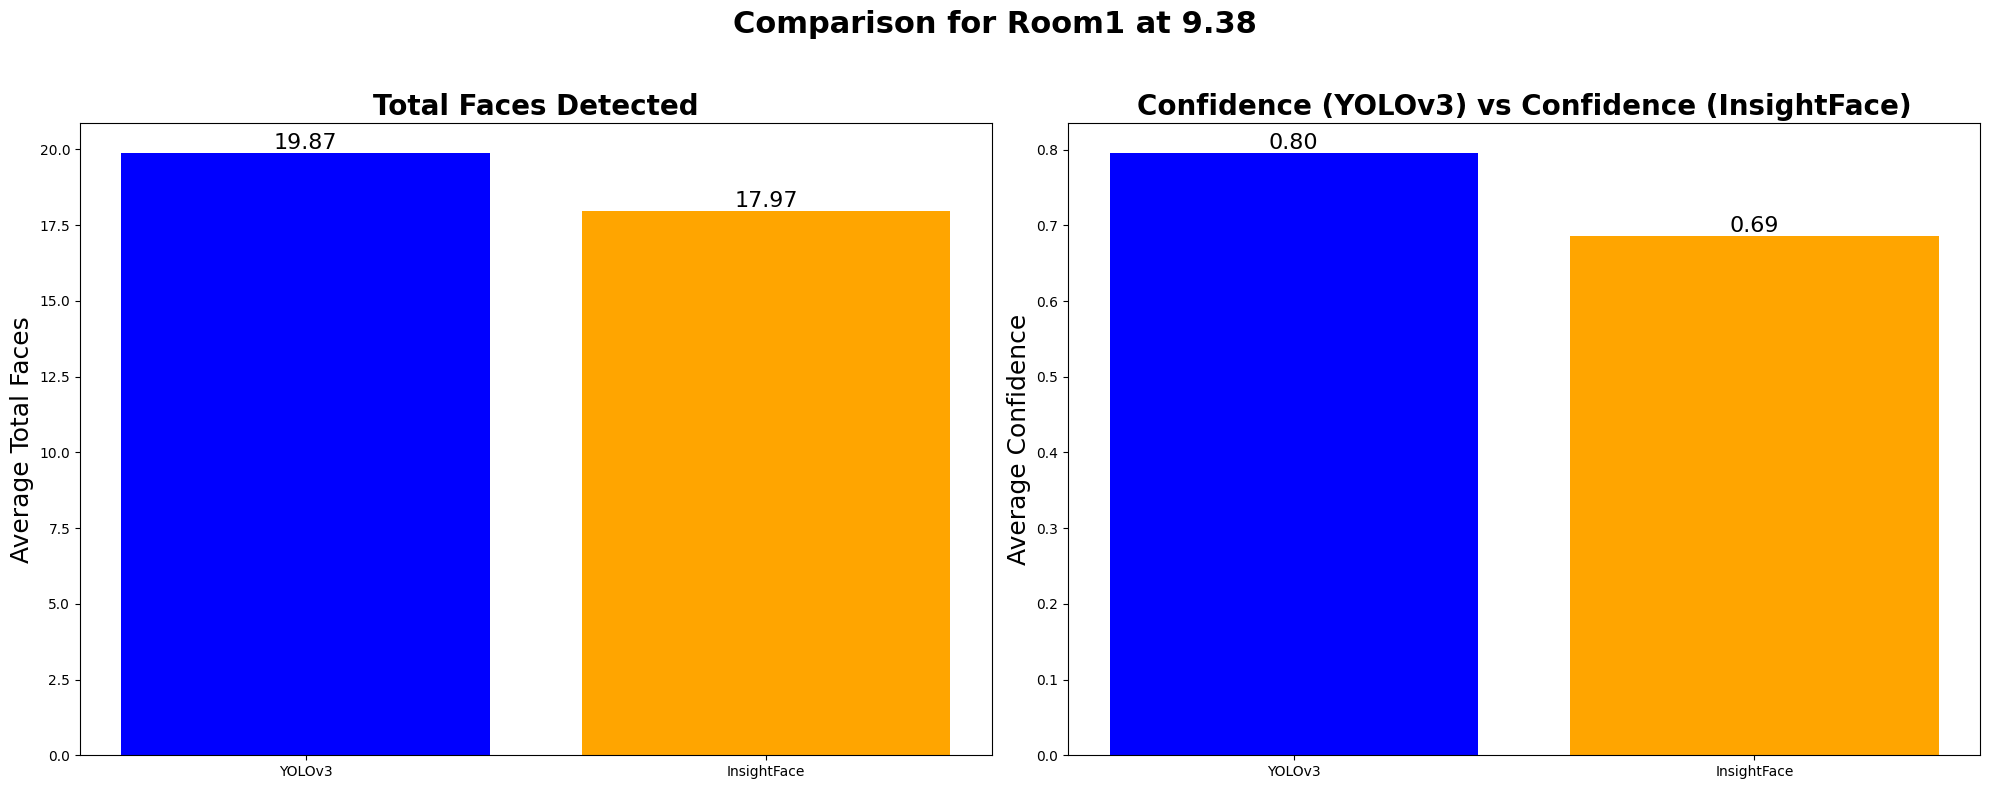

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_files(room_name, folder_path, file_pairs):
    for yolov3_file, insightface_file in file_pairs:
        # Load the data
        yolov3_df = pd.read_csv(os.path.join(folder_path, yolov3_file))
        insightface_df = pd.read_csv(os.path.join(folder_path, insightface_file))

        # Calculate averages
        yolov3_total_faces_avg = yolov3_df['Total Faces'].mean()
        yolov3_confidence_avg = yolov3_df['Average Accuracy'].mean()  # Treating YOLOv3's accuracy as confidence
        yolov3_frame_count = len(yolov3_df)

        insightface_total_faces_avg = insightface_df['Total Faces'].mean()
        insightface_confidence_avg = insightface_df['Average Confidence'].mean()
        insightface_frame_count = len(insightface_df)

        # Extract the time from the filename (e.g., '2.38' from 'jam 2.38_output.csv')
        time = yolov3_file.split(' ')[-1].split('_')[0]

        # Print the results with larger text
        print("\n" + "="*70)
        print(f"Results for {room_name} at {time}:".upper())
        print(f"YOLOv3 - Total Faces Detected: {yolov3_total_faces_avg:.2f}, Confidence: {yolov3_confidence_avg:.2f}, Frame Count: {yolov3_frame_count}".upper())
        print(f"INSIGHTFACE - TOTAL FACES DETECTED: {insightface_total_faces_avg:.2f}, CONFIDENCE: {insightface_confidence_avg:.2f}, FRAME COUNT: {insightface_frame_count}".upper())
        print("="*70 + "\n")

        # Visualization for each time
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle(f'Comparison for {room_name} at {time}', fontsize=22, fontweight='bold')

        # Total Faces comparison
        bars1 = axes[0].bar(['YOLOv3', 'InsightFace'], [yolov3_total_faces_avg, insightface_total_faces_avg], color=['blue', 'orange'])
        axes[0].set_title('Total Faces Detected', fontsize=20, fontweight='bold')
        axes[0].set_ylabel('Average Total Faces', fontsize=18)

        # Add values on top of the bars for Total Faces
        for bar in bars1:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=16)

        # Confidence comparison
        bars2 = axes[1].bar(['YOLOv3', 'InsightFace'], [yolov3_confidence_avg, insightface_confidence_avg], color=['blue', 'orange'])
        axes[1].set_title('Confidence (YOLOv3) vs Confidence (InsightFace)', fontsize=20, fontweight='bold')
        axes[1].set_ylabel('Average Confidence', fontsize=18)

        # Add values on top of the bars for Confidence
        for bar in bars2:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=16)

        # Adjust layout for better spacing
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Define the folder paths and file pairs ordered by Room, Recording Time, Duration, and Camera Position
folders_and_files = [
    ('Lab1', 'Data/Lab1/', [('jam 14.38_output.csv', 'jam 14.38retina_output.csv'),  # Center
                            ('jam 15.14_output.csv', 'jam 15.14retina_output.csv'),  # Right corner
                            ('jam 15.23_output.csv', 'jam 15.23retina_output.csv')]),  # Left corner

    ('Lab3', 'Data/Lab3/', [('kamera di jam 14.57_output.csv', 'kamera di jam 14.57retina_output.csv'),  # Center
                            ('kamera di jam 14.51_output.csv', 'kamera di jam 14.51retina_output.csv'),  # Right corner
                            ('kamera di jam 15.06_output.csv', 'kamera di jam 15.06retina_output.csv')]),  # Left corner

    ('Room1', 'Data/Room1/', [('kamera di jam 9.45_output.csv', 'kamera di jam 9.45retina_output.csv'),  # Center
                              ('kamera di jam 9.52_output.csv', 'kamera di jam 9.52retina_output.csv'),  # Right corner
                              ('kamera di jam 9.38_output.csv', 'kamera di jam 9.38retina_output.csv')])  # Left corner
]

# Process all folders and files
for room_name, folder_path, file_pairs in folders_and_files:
    process_files(room_name, folder_path, file_pairs)
